In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


In [24]:
data  = pd.read_csv('data\data.csv')
sample =  data


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rates\AppData\Local\Temp\ipykernel_11152\399143453.py:1: SyntaxWarning: invalid escape sequence '\d'
  data  = pd.read_csv('data\data.csv')


In [25]:
sample ['MultipleLines'] = sample['MultipleLines'].replace('No phone service', 'No')
sample.MultipleLines.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
obj_cols = sample.select_dtypes(include='object').columns

obj_cols


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le_dict = {}

for col in obj_cols:
    if col != "customerID":
   
        sample[col] = sample[col].astype(str)

        le = LabelEncoder()
        sample[col] = le.fit_transform(sample[col])
        le_dict[col] = le


        try:
            mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(f"{col} mapping: {mapping}")
        except Exception as e:
            print(f"Could not print mapping for {col}: {e}")


gender mapping: {'Female': np.int64(0), 'Male': np.int64(1)}
Partner mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
Dependents mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
PhoneService mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
MultipleLines mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
InternetService mapping: {'DSL': np.int64(0), 'Fiber optic': np.int64(1), 'No': np.int64(2)}
OnlineSecurity mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
OnlineBackup mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
DeviceProtection mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
TechSupport mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
StreamingTV mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
StreamingMovies mapping: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
Contract 

In [28]:

##Scalin the total value
scaler = MinMaxScaler()
sample['TotalCharges'] = scaler.fit_transform(sample[['TotalCharges']])
sample.TotalCharges

0       0.181422
1       0.045687
2       0.737251
3       0.226730
4       0.569100
          ...   
5629    0.895545
5630    0.919431
5631    0.347678
5632    0.619905
5633    0.026919
Name: TotalCharges, Length: 5634, dtype: float64

In [ ]:
def preprocess(sample):
    sample ['MultipleLines'] = sample['MultipleLines'].replace('No phone service', 'No')
    obj_cols = sample.select_dtypes(include='object').columns

    le_dict = {}

    for col in obj_cols:
        if col != "customerID":
    
            sample[col] = sample[col].astype(str)

            le = LabelEncoder()
            sample[col] = le.fit_transform(sample[col])
            le_dict[col] = le


            # try:
            #     mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            #     print(f"{col} mapping: {mapping}")
            # except Exception as e:
            #     print(f"Could not print mapping for {col}: {e}")
    return sample



In [39]:

# sample.describe()

In [37]:
# corr = sample.iloc[:,1:].corr()
# corr

In [38]:
# sns.heatmap(corr)
# plt.show()

### Modeling

In [32]:
df = sample


X = df.drop(columns=["customerID", "churned"])
y = df["churned"]


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [33]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

model.fit(X_train, y_train)

# Predict churn probabilities
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)

# AUC-ROC
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Confusion matrix and detailed report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

AUC-ROC Score: 0.8475
[[761  67]
 [154 145]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       828
           1       0.68      0.48      0.57       299

    accuracy                           0.80      1127
   macro avg       0.76      0.70      0.72      1127
weighted avg       0.79      0.80      0.79      1127



c:\Users\rates\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:02:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC-ROC Score: 0.8475271840111159


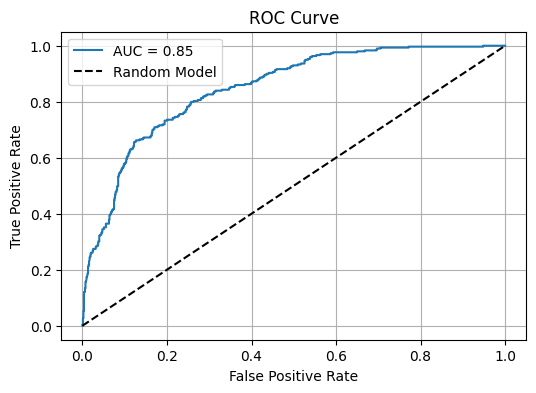

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# y_test: true labels (0 or 1)
# y_pred_proba: predicted probabilities from the model (e.g., model.predict_proba(X_test)[:, 1])

# Example:
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Get the probability of class 1
auc_score = roc_auc_score(y_val, y_pred_proba)


print("AUC-ROC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [50]:

test_df = pd.read_csv(r"data\test.csv")
test_df = preprocess(test_df)
X_test = test_df.drop(columns=["customerID"])
customer_ids = test_df["customerID"]

model = joblib.load("models/model.pkl")

# Predict churn probabilities
test_preds = model.predict_proba(X_test)[:, 1]

# Save to predictions.csv
output = pd.DataFrame({
    "customerID": customer_ids,
    "Churn_Probability": test_preds
})

output.to_csv("predictions/predictions.csv", index=False)


In [51]:
import joblib

# After training
joblib.dump(model, "models/model.pkl")


['models/model.pkl']

ValueError: Found input variables with inconsistent numbers of samples: [1127, 1409]